In [1]:
import gizmo_analysis as gizmo
import utilities as ut
import matplotlib as mpl
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import colors

import h5py
import os

from IPython.utils import io

In [2]:
gal1_type='SIDM10v'
gal2_type='SIDM10v'

# Define input conditions

In [3]:
g1 = h5py.File('/scratch/gpfs/mlisanti/MW_evolution/' + gal1_type + '/output/snapshot_051.hdf5','r')
g2 = h5py.File('/scratch/gpfs/mlisanti/Sat_evolution/' + gal2_type + '/output/snapshot_051.hdf5','r')

Define the following as integers since they are used in filename...

In [4]:
g1_xyz_start = np.array([0, 0, 0])
g1_vxyz_start = np.array([0, 0, 0])

g2_xyz_start=np.array([-80, 50, -8])
g2_vxyz_start = np.array([140, -50, 30])

In [5]:
comp = h5py.File('/scratch/gpfs/mlisanti/foo/outputfiles/MW_cuspy_Sat_cuspy--80-50--8-140--50-30.hdf5','r')

# Shift gal1 and gal2 to their specified initial position and velocity

In [6]:
g1_part1_coords = g1['PartType1']['Coordinates'] + g1_xyz_start
g1_part1_vels = g1['PartType1']['Velocities'] + g1_vxyz_start
g1_part1_mass = g1['PartType1']['Masses'][:]
g1_part1_ids = g1['PartType1']['ParticleIDs'][:]

g1_part2_coords = g1['PartType2']['Coordinates'] + g1_xyz_start
g1_part2_vels = g1['PartType2']['Velocities'] + g1_vxyz_start
g1_part2_mass = g1['PartType2']['Masses'][:]
g1_part2_ids = g1['PartType2']['ParticleIDs'][:]


In [7]:
g2_part1_coords = g2['PartType1']['Coordinates'] + g2_xyz_start
g2_part1_vels = g2['PartType1']['Velocities'] + g2_vxyz_start
g2_part1_mass = g2['PartType1']['Masses'][:]
g2_part1_ids = g2['PartType1']['ParticleIDs'][:]

g2_part2_coords = g2['PartType2']['Coordinates'] + g2_xyz_start
g2_part2_vels = g2['PartType2']['Velocities'] + g2_vxyz_start
g2_part2_mass = g2['PartType2']['Masses'][:]
g2_part2_ids = g2['PartType2']['ParticleIDs'][:]

# Shift gal1 and gal2 to the COM and COV frame

In [8]:
def find_com():
    
    Mtot = np.sum(g1_part1_mass) + np.sum(g1_part2_mass) + np.sum(g2_part1_mass) +  np.sum(g2_part2_mass)

    R_cm = []
    
    for i in range(3):
        xyz_cm = np.sum(g1_part1_coords[:,i] * g1_part1_mass) + np.sum(g1_part2_coords[:,i] * g1_part2_mass)
        xyz_cm += np.sum(g2_part1_coords[:,i] * g2_part1_mass) + np.sum(g2_part2_coords[:,i] * g2_part2_mass)
        xyz_cm /= Mtot
        
        R_cm.append(xyz_cm)
        
    return np.array(R_cm)

def find_cov():
    
    Mtot = np.sum(g1_part1_mass) + np.sum(g1_part2_mass) + np.sum(g2_part1_mass) +  np.sum(g2_part2_mass)

    V_cm = []
    
    for i in range(3):
        vxyz_cm = np.sum(g1_part1_vels[:,i] * g1_part1_mass) + np.sum(g1_part2_vels[:,i] * g1_part2_mass)
        vxyz_cm += np.sum(g2_part1_vels[:,i] * g2_part1_mass) + np.sum(g2_part2_vels[:,i] * g2_part2_mass)
        vxyz_cm /= Mtot
        
        V_cm.append(vxyz_cm)
        
    return np.array(V_cm)
    

In [9]:
Rcm = find_com()
print(Rcm)
Vcm = find_cov()
print(Vcm)

[-12.23129386   7.25079392  -1.76292323]
[21.53634343 -7.94863092  4.2883418 ]


In [10]:
g1_part1_coords_cm = g1_part1_coords - Rcm
g1_part2_coords_cm = g1_part2_coords - Rcm

g1_part1_vels_cm = g1_part1_vels - Vcm
g1_part2_vels_cm = g1_part2_vels - Vcm

In [11]:
g2_part1_coords_cm = g2_part1_coords - Rcm
g2_part2_coords_cm = g2_part2_coords - Rcm

g2_part1_vels_cm = g2_part1_vels - Vcm
g2_part2_vels_cm = g2_part2_vels - Vcm

# Join up the files and align Particle IDs

In [12]:
g1_ndm = len(g1_part1_ids)
g1_nstar = len(g1_part2_ids)
print(g1_ndm, g1_nstar)

g2_ndm = len(g2_part1_ids)
g2_nstar = len(g2_part2_ids)
print(g2_ndm, g2_nstar)

1000000 100000
180000 21000


In [13]:
g1_part1_ids_join = g1_part1_ids
g1_part2_ids_join = g1_part2_ids
g2_part1_ids_join = g2_part1_ids + g1_ndm + g1_nstar
g2_part2_ids_join = g2_part2_ids + g1_ndm + g1_nstar

(0.0, 1500.0)

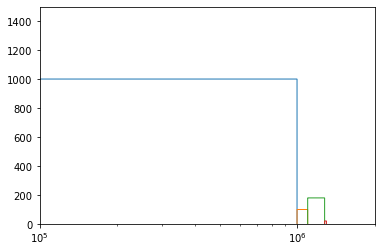

In [14]:
plt.hist(g1_part1_ids_join, bins=1000, histtype='step')
plt.hist(g1_part2_ids_join, bins=1000, histtype='step')
plt.hist(g2_part1_ids_join, bins=1000, histtype='step')
plt.hist(g2_part2_ids_join, bins=1000, histtype='step')
plt.xscale('log')
plt.xlim([1e5, 2e6])
plt.ylim([0, 1500])

In [15]:
"""
plt.hist(comp['PartType1']['ParticleIDs'], bins=1000, histtype='step')
plt.hist(comp['PartType2']['ParticleIDs'], bins=1000, histtype='step')
plt.xscale('log')
plt.xlim([1e5, 2e6])
plt.ylim([0, 1500])
"""

"\nplt.hist(comp['PartType1']['ParticleIDs'], bins=1000, histtype='step')\nplt.hist(comp['PartType2']['ParticleIDs'], bins=1000, histtype='step')\nplt.xscale('log')\nplt.xlim([1e5, 2e6])\nplt.ylim([0, 1500])\n"

# Concatenate gal1 and gal2 arrays

In [16]:
part1_coords = np.concatenate((g1_part1_coords_cm, g2_part1_coords_cm))
part2_coords = np.concatenate((g1_part2_coords_cm, g2_part2_coords_cm))
print(len(part1_coords), len(part2_coords))

1180000 121000


In [17]:
part1_vels = np.concatenate((g1_part1_vels_cm, g2_part1_vels_cm))
part2_vels = np.concatenate((g1_part2_vels_cm, g2_part2_vels_cm))
print(len(part1_vels), len(part2_vels))

1180000 121000


In [18]:
part1_ids = np.concatenate((g1_part1_ids_join, g2_part1_ids_join))
part2_ids = np.concatenate((g1_part2_ids_join, g2_part2_ids_join))
print(len(part1_ids), len(part2_ids))

1180000 121000


In [19]:
part1_mass = np.concatenate((g1_part1_mass, g2_part1_mass))
part2_mass = np.concatenate((g1_part2_mass, g2_part2_mass))
print(len(part1_mass), len(part2_mass))

1180000 121000


(0.0, 1500.0)

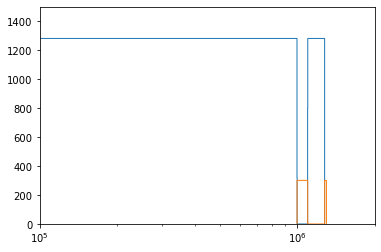

In [20]:
plt.hist(part1_ids, bins=1000, histtype='step')
plt.hist(part2_ids, bins=1000, histtype='step')
plt.xscale('log')
plt.xlim([1e5, 2e6])
plt.ylim([0, 1500])

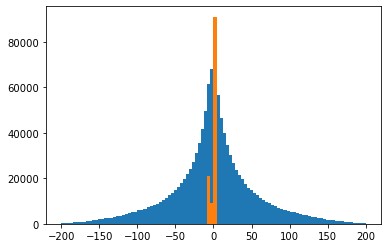

In [21]:
plt.hist(part1_coords[:,2], range=(-200,200), bins=100)
plt.hist(part2_coords[:,2], range=(-200,200), bins=100)
plt.show()

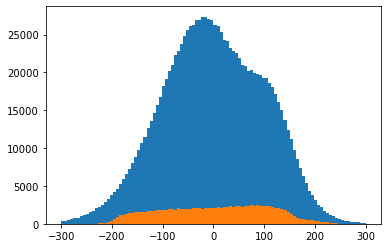

In [22]:
plt.hist(part1_vels[:,0], range=(-300,300), bins=100)
plt.hist(part2_vels[:,0], range=(-300,300), bins=100)
plt.show()

# Save to hdf5 file

In [23]:
directory = '/scratch/gpfs/mlisanti/Selfcons-' + \
                str(g2_xyz_start[0]) + '-' + str(g2_xyz_start[1]) + '-' + str(g2_xyz_start[2]) + '-' + \
                str(g2_vxyz_start[0]) + '-' + str(g2_vxyz_start[1]) + '-' + str(g2_vxyz_start[2]) + \
                '/ICs/'

output_filename = 'MW_' + gal1_type + '_Sat_' + gal2_type + '-' + \
                str(g2_xyz_start[0]) + '-' + str(g2_xyz_start[1]) + '-' + str(g2_xyz_start[2]) + '-' + \
                str(g2_vxyz_start[0]) + '-' + str(g2_vxyz_start[1]) + '-' + str(g2_vxyz_start[2]) + '.hdf5'

print(directory)
print(output_filename)

/scratch/gpfs/mlisanti/Selfcons--80-50--8-140--50-30/ICs/
MW_SIDM10v_Sat_SIDM10v--80-50--8-140--50-30.hdf5


In [24]:
if os.path.exists(directory + output_filename):
    os.remove(directory + output_filename)
else:
    print("Cannot delete the file as it does not exist")

In [25]:
file = h5py.File(directory + output_filename, 'w')

In [26]:
npart = np.array([0,g1_ndm + g2_ndm, g1_nstar+g2_nstar,0,0,0])
print(npart)

[      0 1180000  121000       0       0       0]


In [27]:
h = file.create_group('Header')
h.attrs['NumPart_ThisFile'] = npart   
h.attrs['NumPart_Total'] = npart                  
h.attrs['NumPart_Total_HighWord'] = 0*npart 

## everything below this point will just be written over
## need to set values for the code to read

h.attrs['MassTable'] = np.zeros(6)
h.attrs['Time'] = 0.0  
h.attrs['Redshift'] = 0.0 
h.attrs['BoxSize'] = 1.0 
h.attrs['NumFilesPerSnapshot'] = 1                                      
h.attrs['Omega0'] = 1.0 
h.attrs['OmegaLambda'] = 0.0 
h.attrs['HubbleParam'] = 1.0                                                                    
h.attrs['Flag_Sfr'] = 0 
h.attrs['Flag_Cooling'] = 0 
h.attrs['Flag_StellarAge'] = 0 
h.attrs['Flag_Metals'] = 0 
h.attrs['Flag_Feedback'] = 0 
h.attrs['Flag_DoublePrecision'] = 0
h.attrs['Flag_IC_Info'] = 0

In [28]:
p1 = file.create_group('PartType1')
p1.create_dataset('Coordinates', data=part1_coords)
p1.create_dataset('Velocities', data=part1_vels)
p1.create_dataset('ParticleIDs', data=part1_ids)
p1.create_dataset('Masses', data=part1_mass)

<HDF5 dataset "Masses": shape (1180000,), type "<f4">

In [29]:
p2 = file.create_group('PartType2')
p2.create_dataset('Coordinates', data=part2_coords)
p2.create_dataset('Velocities', data=part2_vels)
p2.create_dataset('ParticleIDs', data=part2_ids)
p2.create_dataset('Masses', data=part2_mass)

<HDF5 dataset "Masses": shape (121000,), type "<f4">

In [30]:
file.close()

In [31]:
test = h5py.File(directory + output_filename,'r')

In [32]:
test.keys()

<KeysViewHDF5 ['Header', 'PartType1', 'PartType2']>

In [33]:
list(test['Header'].keys())

[]

(0.0, 1500.0)

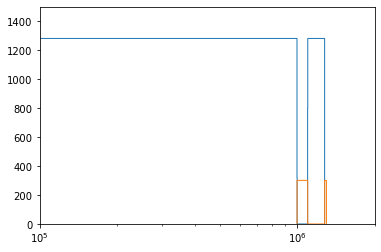

In [34]:
plt.hist(test['PartType1']['ParticleIDs'][:], bins=1000, histtype='step')
plt.hist(test['PartType2']['ParticleIDs'][:], bins=1000, histtype='step')
plt.xscale('log')
plt.xlim([1e5, 2e6])
plt.ylim([0, 1500])

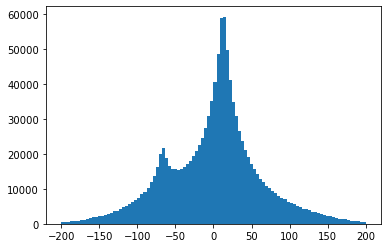

In [39]:
plt.hist(test['PartType1']['Coordinates'][:,0], range=(-200,200), bins=100)
plt.show()

In [36]:
comp.keys()

<KeysViewHDF5 ['Header', 'PartType1', 'PartType2']>

In [37]:
test['PartType2'].keys()

<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Velocities']>

In [38]:
comp['PartType2'].keys()

<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Velocities']>